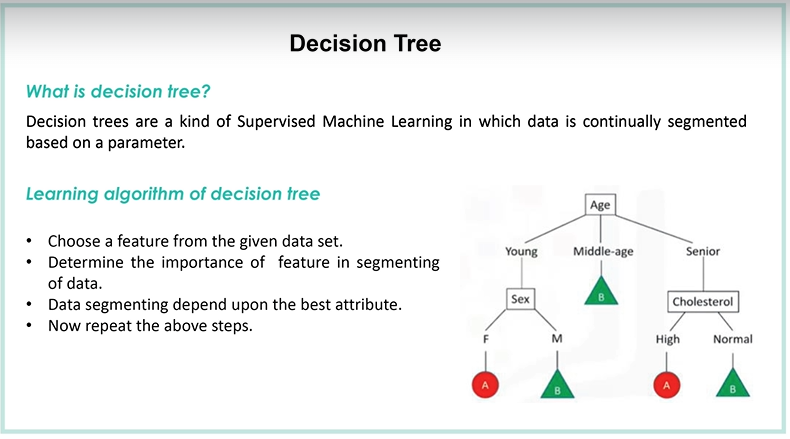

It breaks down a dataset into smaller and smaller subsets.
The final result is a tree with decision nodes and leaf nodes.
A decision node example age,sex,cholesterol has two or more branches.
The leaf node example middle edge represents a classification or decision.

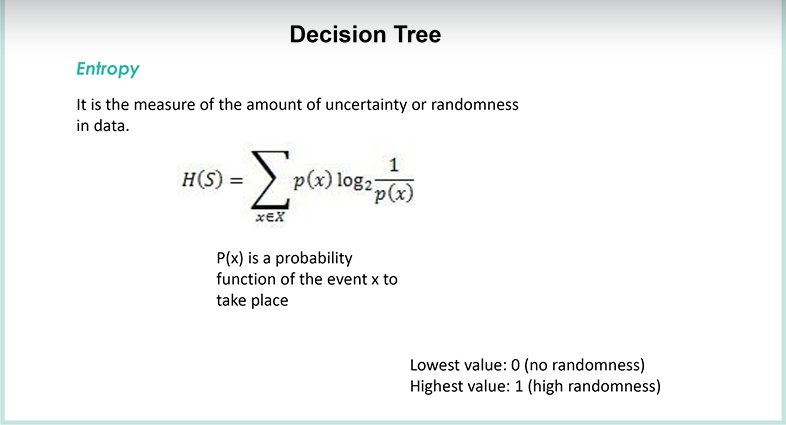

Entropy is the measure of the amount of uncertainty or randomness in the data.
Intuitively, it tells us about the predictability of a certain event.

For example, consider a coin toss that has a probability of heads of 0.5 and a probability of tailsof 0.5.
Here, the entropy is the highest possible sense.
There's no way of determining what the outcome might be.

Alternatively, consider a coin that has heads on both sides of the coin.
The entry of such an event can be predicted perfectly, since we know beforehand that it'll always beheads.
In other words, this event has no randomness.
Hence its entropy is zero.

In particular, law values imply less uncertainty, while high values imply high uncertainty.

### So while choosing parameter for each node in a tree, the decision tree measures this value and choose the one with high certainty.

## Building a Decision Tree in Python
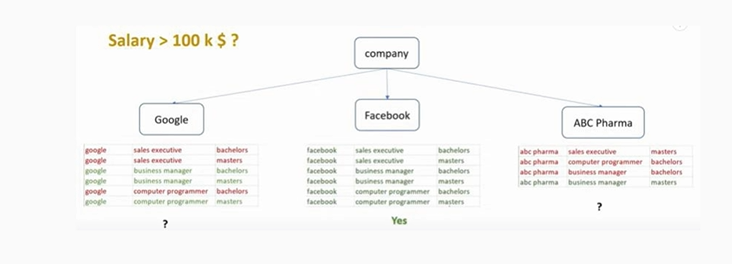

So this tree has two depths because there is only 2 layer of decision nodes

According to our dataset, our decision tree tells us that if a person works at Facebook, then yes,he or she would have a salary higher than $100,000, regardless of the degree and position.

In [1]:
#import libraries

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
#import dataset

dataset= pd.read_csv('salaries.csv')

In [3]:
dataset

,company,job,degree,salary_more_then_100k
0,google,sale exective,bachelaors,0
1,google,sale exective,masters,0
2,google,business manager,bachelaors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelaors,0
5,google,computer programmer,masters,1
6,abc pharma,sale exective,masters,0
7,abc pharma,computer programmer,bachelaors,0
8,abc pharma,business manager,bachelaors,0
9,abc pharma,business manager,masters,1


In [4]:
#here we need to also have data of column names so we pass header as firstrow of dataa
col_names=['company','job','degree','salary_more_then_100k']
df=pd.read_csv('salaries.csv',header=None,names=col_names)
df

,company,job,degree,salary_more_then_100k
0,company,job,degree,salary_more_then_100k
1,google,sale exective,bachelaors,0
2,google,sale exective,masters,0
3,google,business manager,bachelaors,1
4,google,business manager,masters,1
5,google,computer programmer,bachelaors,0
6,google,computer programmer,masters,1
7,abc pharma,sale exective,masters,0
8,abc pharma,computer programmer,bachelaors,0
9,abc pharma,business manager,bachelaors,0


#### So at this point, we all know that machine learning algorithms work on numbers and not on the labels.So we will convert our columns which have labels into numbers.

## use Label Encoder

In [5]:
#import Label Encoder
from sklearn import preprocessing

#label_encoder object knows how to understand word labels
label_encoder= preprocessing.LabelEncoder()

#Encode Labels in column
df['company']=label_encoder.fit_transform(df['company'])
df['job']=label_encoder.fit_transform(df['job'])
df['degree']=label_encoder.fit_transform(df['degree'])
print(df.head())

   company  job  degree  salary_more_then_100k
0        1    2       1  salary_more_then_100k
1        3    3       0                      0
2        3    3       2                      0
3        3    0       0                      1
4        3    0       2                      1


In [6]:
#Split the dataset in features X and target variable Y
X= df.iloc[:,:3]
Y= df.iloc[:,3]
X

,company,job,degree
0,1,2,1
1,3,3,0
2,3,3,2
3,3,0,0
4,3,0,2
5,3,1,0
6,3,1,2
7,0,3,2
8,0,1,0
9,0,0,0


In [7]:
Y

0     salary_more_then_100k
1                         0
2                         0
3                         1
4                         1
5                         0
6                         1
7                         0
8                         0
9                         0
10                        1
11                        1
12                        1
13                        1
14                        1
15                        1
16                        1
Name: salary_more_then_100k, dtype: object

In [8]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2,random_state=100)


In [9]:
#Create Decision Tree classifier object using Entropy

clf_entropy = DecisionTreeClassifier(criterion="entropy",max_depth=8)

#Train Decision Tree Classifier
#So now that the blueprint model of our decision tree is built, we need to fit it to our did we do itwith the fit function
clf_entropy = clf_entropy.fit(X_train,Y_train)


In [11]:
#Predict the response for test dataset
Y_pred = clf_entropy.predict(X_test)

print("Accuracy",metrics.accuracy_score(Y_test,Y_pred))

Accuracy 0.75
